# Data visualization
#### 1. Purpose: to have a better understanding of the data that we'll be using 
#### 2. Dataset: GoEmotion from google
Link: https://huggingface.co/datasets/google-research-datasets/go_emotions
#### 3. Description:
* Dataset countains 28 emotions
* Dataset contains 3 subset of dataset - train, validation, and training
* Data is quite clean already, no much cleaning to do
* Has more than 1 label/class in one text 


### Overview of data visualization: 
1. Bar Chat: understanding the data distribution (total count) with the labels/classes
2. Box Plot: preview the text length based on each emotion (primary emotion: emotion that appears on the label first) 
3. Heat map: checking the correlation of each emotion with the other 


PS: Data analysis/visualization will only be done on the training dataset as is is the data that we will be use to train the machine. Validation and testing dataset will be used just to test if the dataset perform as what is it expected to do

# 1. Importing libraries and load data 

In [2]:
# import libraries
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\jessl\miniconda3\envs\torch_gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the GoEmotions dataset
datasets = load_dataset("go_emotions")
print(datasets)

# Print some information about the dataset from training 
train_df = pd.DataFrame(datasets['train'])
print(train_df.head())

# Checking the shape of the data 
print(datasets['train'].shape)
print(datasets['validation'].shape)
print(datasets['test'].shape)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj
(43410, 3)
(5426, 3)
(5427, 3)


# 2. Plotting Graph

## Bar Chart

In [7]:
# cheking how the data is distributed
df = pd.DataFrame(datasets['train'])

# listing emotions based on the labels inside the labels row
type_of_emotion = datasets['train'].features['labels'].feature.names

#print(type_of_emotion)

# initialize each emotion type to 0
emotion_count = {emotion: 0 for emotion in type_of_emotion}

# print(emotion_count)

for labels in df['labels']:
    for label in labels:
        emotion_count[type_of_emotion[label]] += 1

emotion_df = pd.DataFrame(list(emotion_count.items()), columns=['Emotion', 'Count'])
emotion_df

,Emotion,Count
0,admiration,4130
1,amusement,2328
2,anger,1567
3,annoyance,2470
4,approval,2939
5,caring,1087
6,confusion,1368
7,curiosity,2191
8,desire,641
9,disappointment,1269


C:\Users\jessl\AppData\Local\Temp\ipykernel_35968\655276879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Emotion', data=emotion_df, palette='viridis')


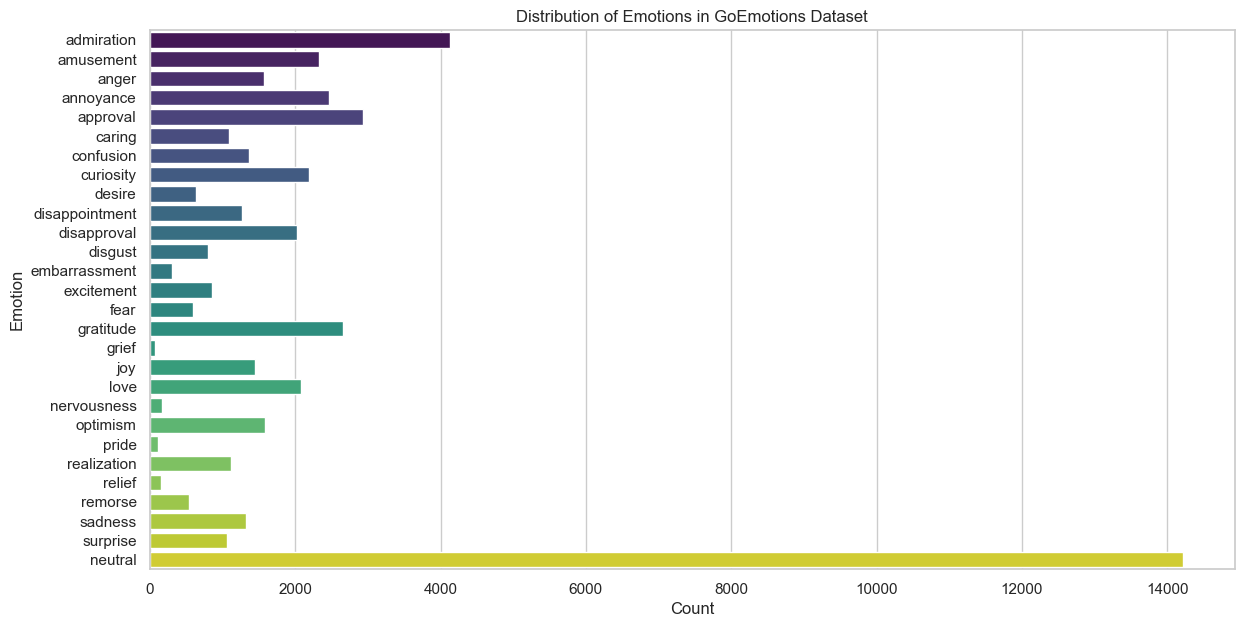

In [6]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Count', y='Emotion', data=emotion_df, palette='viridis')

# Add title and labels
plt.title('Distribution of Emotions in GoEmotions Dataset')
plt.xlabel('Count')
plt.ylabel('Emotion')

# Show the plot
plt.show()
plt.close()

## Box Plot

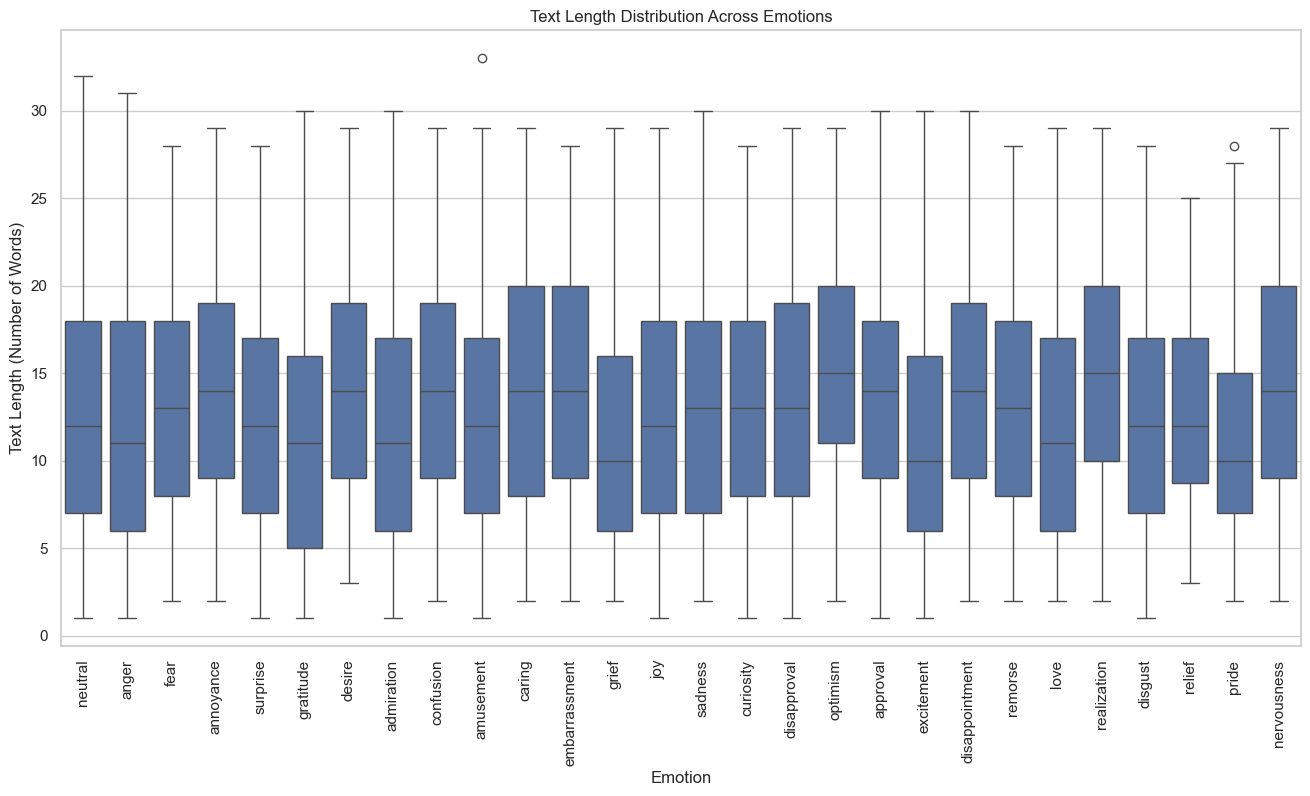

In [9]:
# function to count the length of the text on each row
def calculate_text_length(text):
    return len(text.split())


box_plot_df = df

# passing each text into calculate_text_function
box_plot_df['text_length'] = box_plot_df['text'].apply(calculate_text_length)

# grouping emotion and text length based on the primary emotion (located in index [0])
box_plot_df['primary_emotion'] = box_plot_df['labels'].apply(lambda labels: type_of_emotion[labels[0] if labels else 'None'])

# plotting bar chart
plt.figure(figsize=(16, 8))
sns.boxplot(x='primary_emotion', y='text_length', data=box_plot_df)
plt.xticks(rotation=90)
plt.title('Text Length Distribution Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Text Length (Number of Words)')
plt.show()
plt.close()

## Heat Map

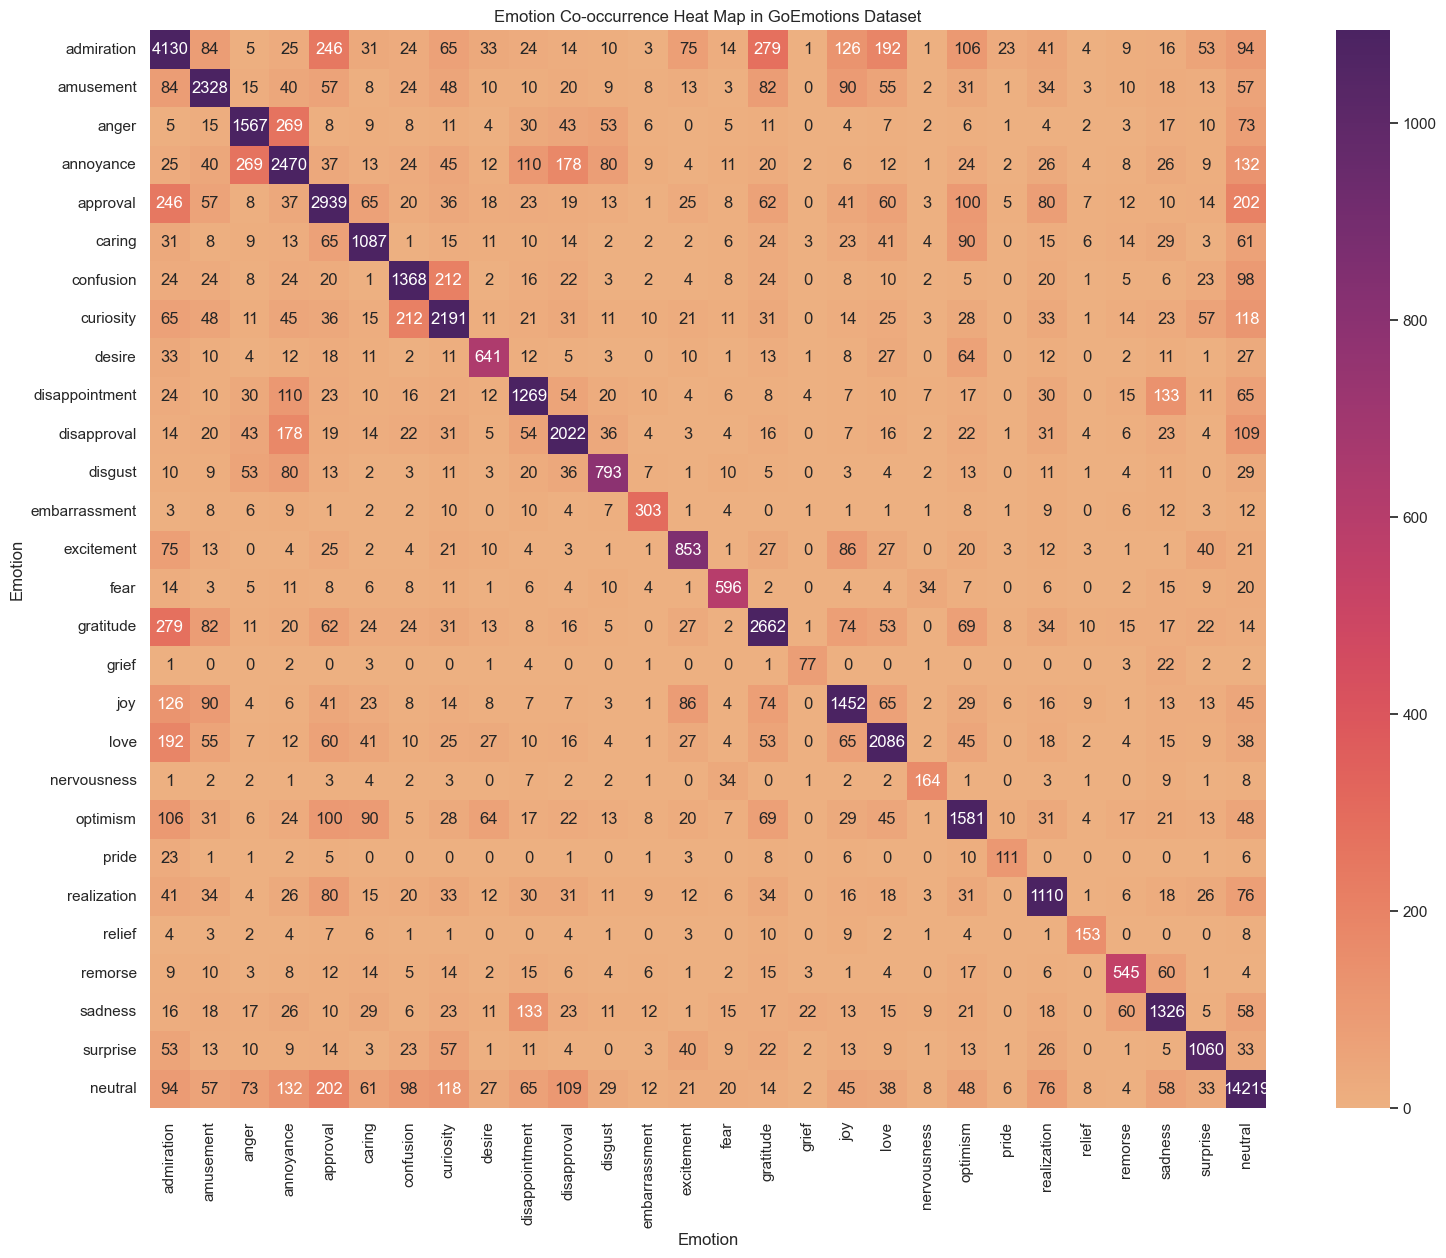

In [10]:
# listing emotions based on the labels inside the labels row
type_of_emotion = datasets['train'].features['labels'].feature.names

num_labels = len(type_of_emotion)

# set the matrix of type of emotion or labels to 0 
co_occurence_matrix= np.zeros((num_labels, num_labels))

# count the number of correlation of emotion in the text
for labels in df['labels']:
    # looping to all of the emotion in the dataframe
    for i in range(len(labels)):
        for j in range(i, len(labels)):
            # checking and adding total occurences of the emotion inside each lable
            co_occurence_matrix[labels[i], labels[j]] += 1
            if i != j:
                co_occurence_matrix[labels[j], labels[i]] += 1

co_occurrence_df = pd.DataFrame(co_occurence_matrix, index=type_of_emotion, columns=type_of_emotion)

# plotting heatmap 
# futher details can be checked in seaborn heatmap function
plt.figure(figsize=(18, 14))
sns.heatmap(co_occurrence_df, annot=True, robust=True, cmap= sns.color_palette("flare", as_cmap=True), fmt='g')
plt.title('Emotion Co-occurrence Heat Map in GoEmotions Dataset')
plt.xlabel('Emotion')
plt.ylabel('Emotion')
plt.show()
plt.close()

11.4 10.0 5 5.4626001134990645


C:\Users\jessl\AppData\Local\Temp\ipykernel_25328\3912611242.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df['Quantity'])


<function matplotlib.pyplot.show(close=None, block=None)>

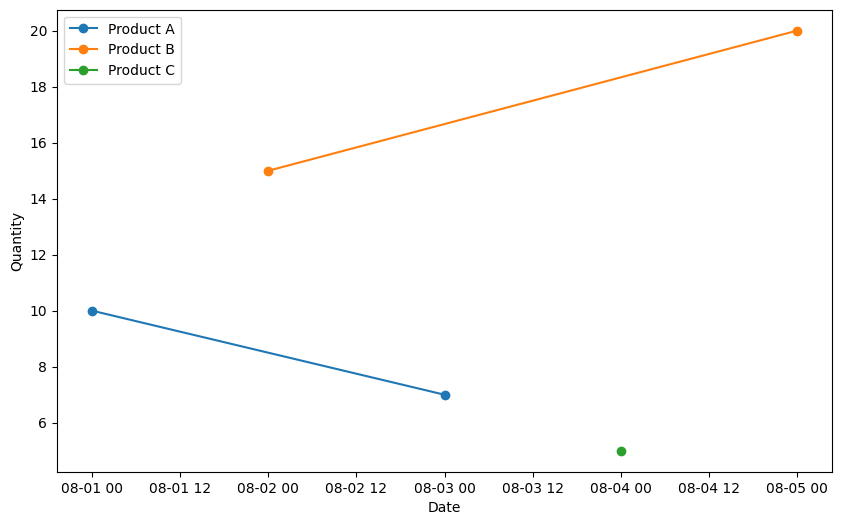

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
data = {
    'Date': ['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05'],
    'Product': ['Product A', 'Product B', 'Product A', 'Product C', 'Product B'],
    'Quantity': [10, 15, 7, 5, 20],
    'Price': [100, 150, 100, 200, 150]
}

# Create DataFrame
df = pd.DataFrame(data)

mean = np.mean(df['Quantity'])
median = np.median(df['Quantity'])
mode = stats.mode(df['Quantity'])
std = np.std(df['Quantity'])
print(mean, median, mode.mode[0], std)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot line chart
plt.figure(figsize=(10, 6))
for product in df['Product'].unique():
    subset = df[df['Product'] == product]
    plt.plot(subset['Date'], subset['Quantity'], marker = 'o', label = product)

plt.xlabel('Date')
plt.ylabel("Quantity")
plt.legend()
plt.show


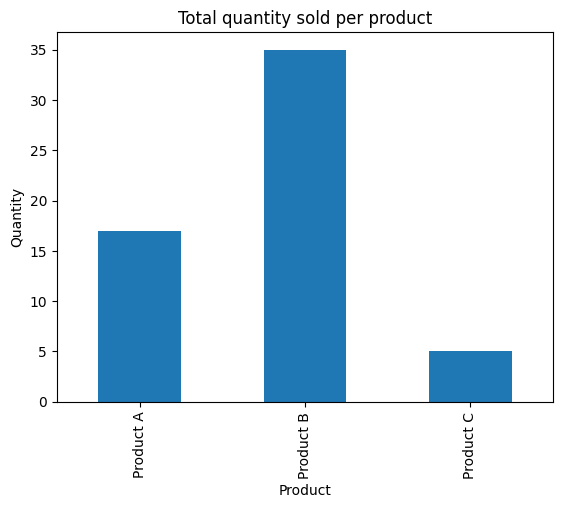

In [8]:
product_quantity = df.groupby('Product')['Quantity'].sum()

product_quantity.plot(kind="bar")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Total quantity sold per product')
plt.show()

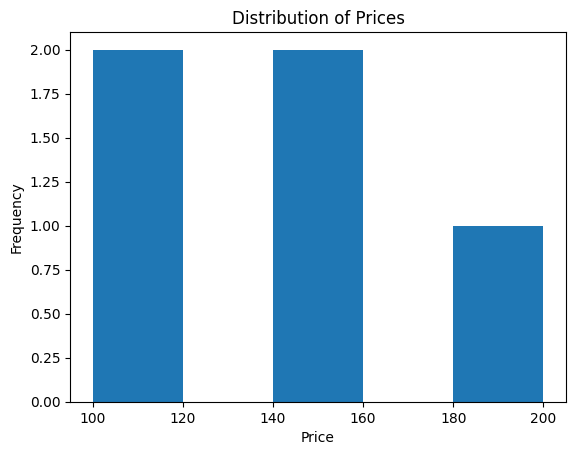

In [12]:
plt.hist(df['Price'],bins = 5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
# plt.grid(True)
plt.show()